In [2]:
from __future__ import absolute_import
import datetime
import os
import random

import torchvision.utils as vutils
from tensorboard import SummaryWriter
from torch import optim
from torch.autograd import Variable
from torch.backends import cudnn
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader

import sys
sys.path.append('..')
import utils.transforms as extended_transforms
import torchvision.transforms as standard_transforms
from datasets import LIP
from models import *
from utils import check_mkdir, evaluate, AverageMeter, CrossEntropyLoss2d
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
cudnn.benchmark = True 

ckpt_path = './'
exp_name = 'lip'

In [6]:
net = FCN8s(num_classes=LIP.num_classes).cuda()

mean_std =([0.485,0.456,0.406], [0.229,0.224,0.225])
val_input_transform = standard_transforms.Compose([
    standard_transforms.ToTensor(),
    standard_transforms.Normalize(*mean_std)
    ])
target_transform = extended_transforms.MaskToTensor()
val_set = LIP.LIP('val',transform = val_input_transform,target_transform=target_transform)
val_loader = DataLoader(val_set, batch_size=1,num_workers =8, shuffle=False)


In [7]:
snapshot ='epoch_1_loss_212659.06102_acc_0.57739_acc-cls_0.05000_mean-iu_0.02887_fwavacc_0.33338_lr_0.0000000001.pth'
print('inference from'+ ckpt_path+ snapshot)
net.load_state_dict(torch.load(os.path.join(ckpt_path,exp_name,snapshot)))

net.eval()

inference from../checkpoints/epoch_1_loss_212659.06102_acc_0.57739_acc-cls_0.05000_mean-iu_0.02887_fwavacc_0.33338_lr_0.0000000001.pth


FCN8s(
  (features3): Sequential(
    (0): Conv2d (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(100, 100))
    (1): ReLU(inplace)
    (2): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (10): Conv2d (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (features4): Sequential(
    (0): C

In [7]:
dataiter =iter(val_loader)
inputs, gts = dataiter.next()
N = inputs.size(0)
print(inputs.size())

torch.Size([1, 3, 423, 187])


In [8]:
ori_img = inputs.squeeze().numpy()
print (ori_img.shape)

(3, 423, 187)


In [10]:
img = ori_img.transpose(1,2,0)

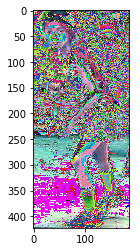

In [11]:
plt.imshow(img)

In [47]:
inputs = Variable(inputs,volatile = True).cuda()

RuntimeError: Variable data has to be a tensor, but got Variable

In [48]:
check_mkdir(os.path.join(ckpt_path, exp_name, 'test'))
outputs = net(inputs)

In [49]:
print(outputs.shape)

torch.Size([1, 20, 423, 187])


In [5]:
check_mkdir(os.path.join(ckpt_path, exp_name))
writer = SummaryWriter(os.path.join(ckpt_path, 'exp', exp_name))

In [13]:
print(inputs.size())

torch.Size([1, 3, 423, 187])


In [22]:
tt=torch.transpose(torch.transpose(inputs,1,3),1,2)

In [23]:
print(tt.size())

torch.Size([1, 423, 187, 3])


In [17]:
import numpy as np

In [24]:
ten = np.ndarray(inputs,dtype=np.float32)

TypeError: 'torch.FloatTensor' object does not support indexing

In [14]:
for epoch in range(3):
    writer.add_scalar('my god',epoch,epoch+1)
    writer.add_scalar('3 time scope',epoch*3,epoch+1)
    writer.add_image('image',inputs)

TypeError: 'torch.FloatTensor' object does not support indexing